<a href="https://colab.research.google.com/github/youngpaper1115/Git_Tutorial/blob/main/Lending_Club_Project_ver1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [263]:
# google drive mount 및 파일 경로 지정

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [264]:
# 필요 라이브러리 import 및 현재 작업공간 확인

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook
%matplotlib inline

os.getcwd()

'/content'

In [265]:
# 데이터 불러오기

lc_df = pd.read_stata('/content/drive/MyDrive/Python_SNU/Lending_Club/lendingclub.dta')

### **<필요한 Column 목록>**

'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_cur_bal', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'emp_length 12', 'initial_list_status', 'debt_settlement_flag', 'term', 'depvar', 'mths_since_last_delinq 1~11', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq'

1. emp_length : 12 or 나머지로 사용 => emp_length12만 추출

2. home_ownership : 1,2 / 3, 4, 5, 6 으로 분류 => 'home_ownership12' 컬럼 추가(3 or 4 or 5 or 6인 경우 값이 1)



In [266]:
lc_df['home_ownership12'] = 0

change_index = lc_df[(lc_df['home_ownership3']==1) | (lc_df['home_ownership4']==1) | (lc_df['home_ownership5']==1) | (lc_df['home_ownership6']==1)].index.tolist()

lc_df.loc[change_index, 'home_ownership12'] = 1

In [267]:
lc_df['home_ownership12'].value_counts()

1    566703
0    526216
Name: home_ownership12, dtype: int64

3. mths_since_last_delinq: 1 or 나머지로 사용 => mths_since_last_delinq1 만 사용

4. mths_since_last_major_derog: 1 or 나머지로 사용 => mths_since_last_major_derog1 만 사용

5. mths_since_last_record: 1 or 나머지로 사용 => mths_since_last_record1 만 사용

6. mths_since_rcnt_il: 1/2~5/6~11 로 구분 => 각각 mths_since_rcnt_il_a, mths_since_rcnt_il_b, mths_since_rcnt_il_c 로 생성

In [268]:
lc_df['mths_since_rcnt_il_a'] = lc_df['mths_since_rcnt_il1']

In [269]:
lc_df['mths_since_rcnt_il_b'] = 0

change_index = lc_df[(lc_df['mths_since_rcnt_il2']==1) | (lc_df['mths_since_rcnt_il3']==1) | (lc_df['mths_since_rcnt_il4']==1) | (lc_df['mths_since_rcnt_il5']==1)].index.tolist()

lc_df.loc[change_index, 'mths_since_rcnt_il_b'] = 1

In [270]:
lc_df['mths_since_rcnt_il_c'] = 0

change_index = lc_df[(lc_df['mths_since_rcnt_il6']==1) | (lc_df['mths_since_rcnt_il7']==1) | (lc_df['mths_since_rcnt_il8']==1) | (lc_df['mths_since_rcnt_il9']==1) | (lc_df['mths_since_rcnt_il10']==1) | (lc_df['mths_since_rcnt_il11']==1)].index.tolist()

lc_df.loc[change_index, 'mths_since_rcnt_il_c'] = 1

In [271]:
lc_df[['mths_since_rcnt_il_a', 'mths_since_rcnt_il_b', 'mths_since_rcnt_il_c']].value_counts()

mths_since_rcnt_il_a  mths_since_rcnt_il_b  mths_since_rcnt_il_c
1                     0                     0                       703807
0                     0                     1                       233010
                      1                     0                       156102
dtype: int64

7. mths_since_recent_bc: 1~6 / 7~11로 구분 => mths_since_recent_bc 열 생성(1~6인 경우 값이 1)

In [272]:
lc_df['mths_since_recent_bc']=0

change_index = lc_df[(lc_df['mths_since_recent_bc1']==1) | (lc_df['mths_since_recent_bc2']==1) | (lc_df['mths_since_recent_bc3']==1) | (lc_df['mths_since_recent_bc4']==1) | (lc_df['mths_since_recent_bc5']==1) | (lc_df['mths_since_recent_bc6']==1)].index.tolist()

lc_df.loc[change_index, 'mths_since_recent_bc']=1

8. mths_since_recent_bc_dlq: 1과 나머지로 구분 => mths_since_recent_bc_dlq1만 사용

9. mths_since_recent_inq: 1 / 2 ~ 6 / 7 ~ 11로 구분 => 각각 mths_since_recent_inq_a, mths_since_recent_inq_b, mths_since_recent_inq_c 로 생성

In [273]:
lc_df['mths_since_recent_inq_a'] = lc_df['mths_since_recent_inq1']

In [274]:
lc_df['mths_since_recent_inq_b']=0

change_index = lc_df[(lc_df['mths_since_recent_inq2']==1) | (lc_df['mths_since_recent_inq3']==1) | (lc_df['mths_since_recent_inq4']==1) | (lc_df['mths_since_recent_inq5']==1) | (lc_df['mths_since_recent_inq6']==1)].index.tolist()

lc_df.loc[change_index, 'mths_since_recent_inq_b']=1

In [275]:
lc_df['mths_since_recent_inq_c']=0

change_index = lc_df[(lc_df['mths_since_recent_inq7']==1) | (lc_df['mths_since_recent_inq8']==1) | (lc_df['mths_since_recent_inq9']==1) | (lc_df['mths_since_recent_inq10']==1)].index.tolist()

lc_df.loc[change_index, 'mths_since_recent_inq_c']=1

In [276]:
lc_df[['mths_since_recent_inq_a','mths_since_recent_inq_b','mths_since_recent_inq_c']].value_counts()

mths_since_recent_inq_a  mths_since_recent_inq_b  mths_since_recent_inq_c
0                        1                        0                          610369
                         0                        1                          366329
1                        0                        0                          116221
dtype: int64

10. delinq_2yrs: 0 / 1~11 / 12 ~ 나머지 => 각각 delinq_2yrs_a, delinq_2yrs_b, delinq_2yrs_c 로 생성

In [277]:
lc_df['delinq_2yrs_a'] = 0

change_index = lc_df[lc_df['delinq_2yrs']==0].index.tolist()

lc_df.loc[change_index, 'delinq_2yrs_a'] = 1

In [278]:
lc_df['delinq_2yrs_b'] = 0

change_index = lc_df[(lc_df['delinq_2yrs'] >= 1) & (lc_df['delinq_2yrs'] <= 11)].index.tolist()

lc_df.loc[change_index, 'delinq_2yrs_b'] = 1

In [279]:
lc_df['delinq_2yrs_c'] = 0

change_index = lc_df[lc_df['delinq_2yrs'] >= 12].index.tolist()

lc_df.loc[change_index, 'delinq_2yrs_c'] = 1

In [280]:
lc_df[['delinq_2yrs_a','delinq_2yrs_b','delinq_2yrs_c']].value_counts()

delinq_2yrs_a  delinq_2yrs_b  delinq_2yrs_c
1              0              0                870371
0              1              0                222128
               0              1                   420
dtype: int64

11. fico_range_low: 그대로 사용(우선)

12. inq_last_6mths: 0 / 1 / 2 ~ 로 구분 => 각각 inq_last_6mths_a, inq_last_6mths_b, inq_last_6mths_c 로 생성

In [281]:
lc_df['inq_last_6mths_a']=0

change_index = lc_df[lc_df['inq_last_6mths'] == 0].index.tolist()

lc_df.loc[change_index, 'inq_last_6mths_a'] = 1

In [282]:
lc_df['inq_last_6mths_b'] = 0

change_index = lc_df[lc_df['inq_last_6mths'] == 1].index.tolist()

lc_df.loc[change_index,'inq_last_6mths_b'] = 1

In [283]:
lc_df['inq_last_6mths_c'] = 0

change_index = lc_df[lc_df['inq_last_6mths'] >= 2].index.tolist()

lc_df.loc[change_index,'inq_last_6mths_c'] = 1

In [284]:
lc_df[['inq_last_6mths_a', 'inq_last_6mths_b', 'inq_last_6mths_c']].value_counts()

inq_last_6mths_a  inq_last_6mths_b  inq_last_6mths_c
1                 0                 0                   635739
0                 1                 0                   293841
                  0                 1                   163339
dtype: int64

13. collections_12_mths_ex_med: 0 / 나머지 => collections_12_mths_ex_med_a 열 생성(0값은 그대로 0)

In [285]:
lc_df['collections_12_mths_ex_med_a'] = 1

change_index = lc_df[lc_df['collections_12_mths_ex_med']==0].index.tolist()

lc_df.loc[change_index, 'collections_12_mths_ex_med_a'] = 0

In [286]:
lc_df['collections_12_mths_ex_med_a'].value_counts()

0    1075061
1      17858
Name: collections_12_mths_ex_med_a, dtype: int64

14. acc_now_delinq: 0/나머지로 우선 => acc_now_delinq_a 열 생성 (0 값은 그대로 0)

In [287]:
lc_df['acc_now_delinq_a'] = 1

change_index = lc_df[lc_df['acc_now_delinq']==0].index.tolist()

lc_df.loc[change_index, 'acc_now_delinq_a'] = 0

In [288]:
lc_df['acc_now_delinq_a'].value_counts()

0    1086940
1       5979
Name: acc_now_delinq_a, dtype: int64

15. chargeoff_within_12_mths: acc_now_delinq 변수 설명력이 떨어진다고 판단되면 추가

16. pub_rec_bankruptcies: 0과 나머지 => pub_rec_bankruptcies_a 열 생성(0값은 그대로 0)

In [289]:
lc_df['pub_rec_bankruptcies_a'] = 1

change_index = lc_df[lc_df['pub_rec_bankruptcies']==0].index.tolist()

lc_df.loc[change_index, 'pub_rec_bankruptcies_a'] = 0

In [290]:
lc_df['pub_rec_bankruptcies_a'].value_counts()

0    959556
1    133363
Name: pub_rec_bankruptcies_a, dtype: int64

17. tax_liens: 0과 나머지 => tax_liens_a 열 생성 (0값은 그대로0)

In [291]:
lc_df['tax_liens_a'] = 1

change_index = lc_df[lc_df['tax_liens']==0].index.tolist()

lc_df.loc[change_index,'tax_liens_a'] = 0

In [292]:
lc_df['tax_liens_a'].value_counts()

0    1052420
1      40499
Name: tax_liens_a, dtype: int64

18. installment: 그대로 사용, loan_amnt, int_rate, term 변수 제외

### **<최종 Column 목록>**

'emp_length12', 'home_ownership12', 'mths_since_last_delinq1', 'mths_since_last_major_derog1', 'mths_since_last_record1', 'mths_since_rcnt_il_a', 'mths_since_rcnt_il_b', 'mths_since_rcnt_il_c', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq1', 'mths_since_recent_inq_a', 'mths_since_recent_inq_b', 'mths_since_recent_inq_c', 'delinq_2yrs_a', 'delinq_2yrs_b', 'delinq_2yrs_c', 'fico_range_low', 'inq_last_6mths_a', 'inq_last_6mths_b', 'inq_last_6mths_c', 'collections_12_mths_ex_med_a', 'acc_now_delinq_a', 'pub_rec_bankruptcies_a', 'tax_liens_a', 'installment', 'depvar'

In [293]:
# 필요 변수 추출한 데이터프레임 재생성

data = lc_df[['emp_length12', 'home_ownership12', 'mths_since_last_delinq1', 'mths_since_last_major_derog1', 'mths_since_last_record1', 'mths_since_rcnt_il_a', 'mths_since_rcnt_il_b', 'mths_since_rcnt_il_c', 
              'mths_since_recent_bc', 'mths_since_recent_bc_dlq1', 'mths_since_recent_inq_a', 'mths_since_recent_inq_b', 'mths_since_recent_inq_c', 'delinq_2yrs_a', 'delinq_2yrs_b', 'delinq_2yrs_c', 
              'fico_range_low', 'inq_last_6mths_a', 'inq_last_6mths_b', 'inq_last_6mths_c', 'collections_12_mths_ex_med_a', 'acc_now_delinq_a', 'pub_rec_bankruptcies_a', 'tax_liens_a', 'installment', 'depvar']]
data.head()

,emp_length12,home_ownership12,mths_since_last_delinq1,mths_since_last_major_derog1,mths_since_last_record1,mths_since_rcnt_il_a,mths_since_rcnt_il_b,mths_since_rcnt_il_c,mths_since_recent_bc,mths_since_recent_bc_dlq1,mths_since_recent_inq_a,mths_since_recent_inq_b,mths_since_recent_inq_c,delinq_2yrs_a,delinq_2yrs_b,delinq_2yrs_c,fico_range_low,inq_last_6mths_a,inq_last_6mths_b,inq_last_6mths_c,collections_12_mths_ex_med_a,acc_now_delinq_a,pub_rec_bankruptcies_a,tax_liens_a,installment,depvar
0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,670,1,0,0,0,0,0,0,605.62,0.0
1,0,0,1,1,1,0,0,1,0,1,0,1,0,1,0,0,690,0,1,0,0,0,0,0,312.86,0.0
2,0,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,665,0,1,0,0,0,0,0,197.78,0.0
3,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,685,1,0,0,0,0,1,0,836.89,1.0
4,0,0,1,1,1,0,0,1,1,1,0,1,0,1,0,0,770,0,1,0,0,0,0,0,269.52,0.0


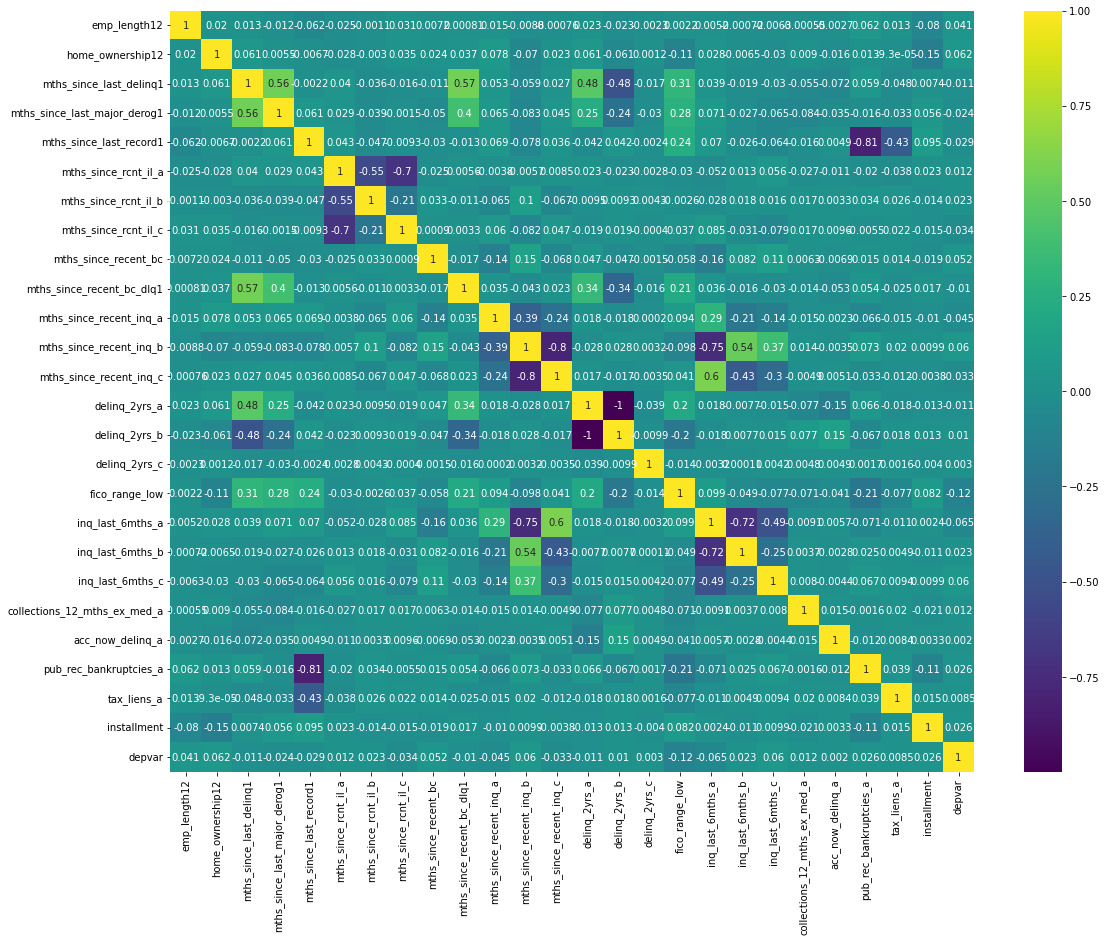

In [294]:
# 변수끼리의 상관성 확인

plt.figure(figsize=(18, 14))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [295]:
# 로지스틱 회귀모델 생성

import statsmodels.api as sm

data = sm.add_constant(data, has_constant = 'add') # 상수항 (beta zero)를 위한 컬럼 추가

X = data[data.columns.difference(['depvar'])] # 변인변수들을 모아놓은 데이터프레임
y = data['depvar'] # 종속변수 데이터프레임

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [296]:
# 학습 set / 평가 set 분리

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(874335, 26) (218584, 26) (874335,) (218584,)


In [297]:
# 데이터 정규화(스케일링)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # 평균 0, 표준편차 1로 변환

train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [298]:
# 모델 생성

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression()

In [299]:
# 모델의 정확도는?

print(model.score(train_X, train_y))

0.8380517764929918


In [300]:
# Test Set을 이용한 모델의 정확도 판단

print(model.score(test_X, test_y))

0.8388354133879882


In [301]:
# 회귀계수는?

print(model.coef_)

[[ 1.40764988e-04  8.46414084e-03  0.00000000e+00 -2.97496840e-03
   2.76895596e-03  4.21323269e-03  1.15034216e-01 -3.85965116e-01
   1.63103465e-01 -5.20893795e-02 -1.42909974e-03  7.38421687e-02
   1.36693942e-01  5.91409740e-02  4.86886151e-03  2.97772013e-03
   1.42929343e-02  4.93812895e-02 -5.88940400e-02  9.46388941e-02
   7.97884327e-03 -6.40721853e-02  3.70809184e-02  2.83165141e-03
  -1.76117359e-02 -2.74507630e-03]]


정확도가 이전보다 많이 낮다..


mths_since_rcnt_il, delinq_2yrs, inq_last_6mths의 범주 변수의 경우, 상관관계가 너무 높은 것으로 나타나 _a 변수만 사용해보자


mths_since_last_record1 와 pub_rec_bankruptcies_a 변수도 상관관계가 높으니 mths_since_last_record1 만 사용해보자

In [302]:
# 필요 변수 추출한 데이터프레임 재생성

data = lc_df[['emp_length12', 'home_ownership12', 'mths_since_last_delinq1', 'mths_since_last_major_derog1', 'mths_since_last_record1', 'mths_since_rcnt_il_a', 
              'mths_since_recent_bc', 'mths_since_recent_bc_dlq1', 'mths_since_recent_inq_a', 'mths_since_recent_inq_b', 'mths_since_recent_inq_c', 'delinq_2yrs_a', 
              'fico_range_low', 'inq_last_6mths_a', 'collections_12_mths_ex_med_a', 'acc_now_delinq_a', 'tax_liens_a', 'installment', 'depvar']]

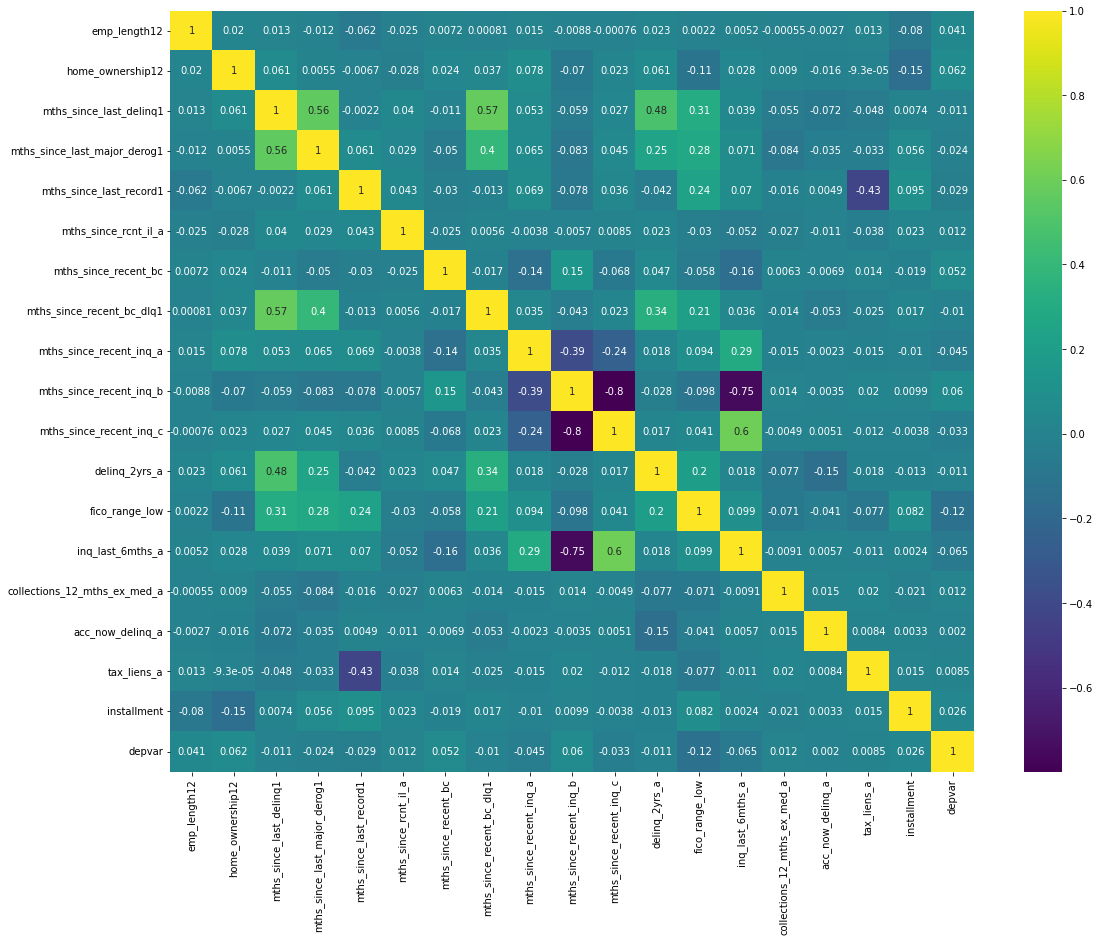

In [303]:
# 변수끼리의 상관성 확인

plt.figure(figsize=(18, 14))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [304]:
# 로지스틱 회귀모델 생성

import statsmodels.api as sm

data = sm.add_constant(data, has_constant = "add")    # 상수항 (beta zero)를 위한 컬럼 추가

X = data[data.columns.difference(['depvar'])]    # 변인변수들을 모아놓은 데이터프레임
y = data['depvar']    # 종속변수 데이터프레임

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [305]:
# 학습 set / 평가 set 분리

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(874335, 19) (218584, 19) (874335,) (218584,)


In [306]:
# 데이터 정규화 (스케일링)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()    # 평균 0, 표준편차 1로 변환

train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [307]:
# 모델 생성

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression()

In [308]:
# 모델의 정확도는...?

print(model.score(train_X, train_y))

0.8380986692743628


In [309]:
# Test Set을 이용한 모델의 정확도 판단
  
print(model.score(test_X, test_y))

0.8386569922775684


In [310]:
# 회귀 계수는?

print(model.coef_)

[[ 9.86314101e-05  9.62933868e-03  0.00000000e+00 -9.59233002e-03
   1.12322495e-01 -3.88005514e-01  1.60200774e-01 -8.10336238e-02
   1.36839610e-01  6.57807654e-02  1.11279013e-03  1.24723450e-02
   2.80677145e-02  9.98512032e-02  4.63278282e-03 -7.25069655e-02
   4.68857964e-02 -2.00126808e-03 -1.20254467e-03]]


상관관계가 0.5이상인 변수 좀더 제거..: mths_since_last_delinq1, delinq_2yrs_a, inq_last_6mths_a

In [311]:
# 필요 변수 추출한 데이터프레임 재생성

data = lc_df[['emp_length12', 'home_ownership12', 'mths_since_last_major_derog1', 'mths_since_last_record1', 'mths_since_rcnt_il_a', 
              'mths_since_recent_bc', 'mths_since_recent_bc_dlq1', 'mths_since_recent_inq_a', 'mths_since_recent_inq_b', 'mths_since_recent_inq_c', 
              'fico_range_low', 'collections_12_mths_ex_med_a', 'acc_now_delinq_a', 'tax_liens_a', 'installment', 'depvar']]

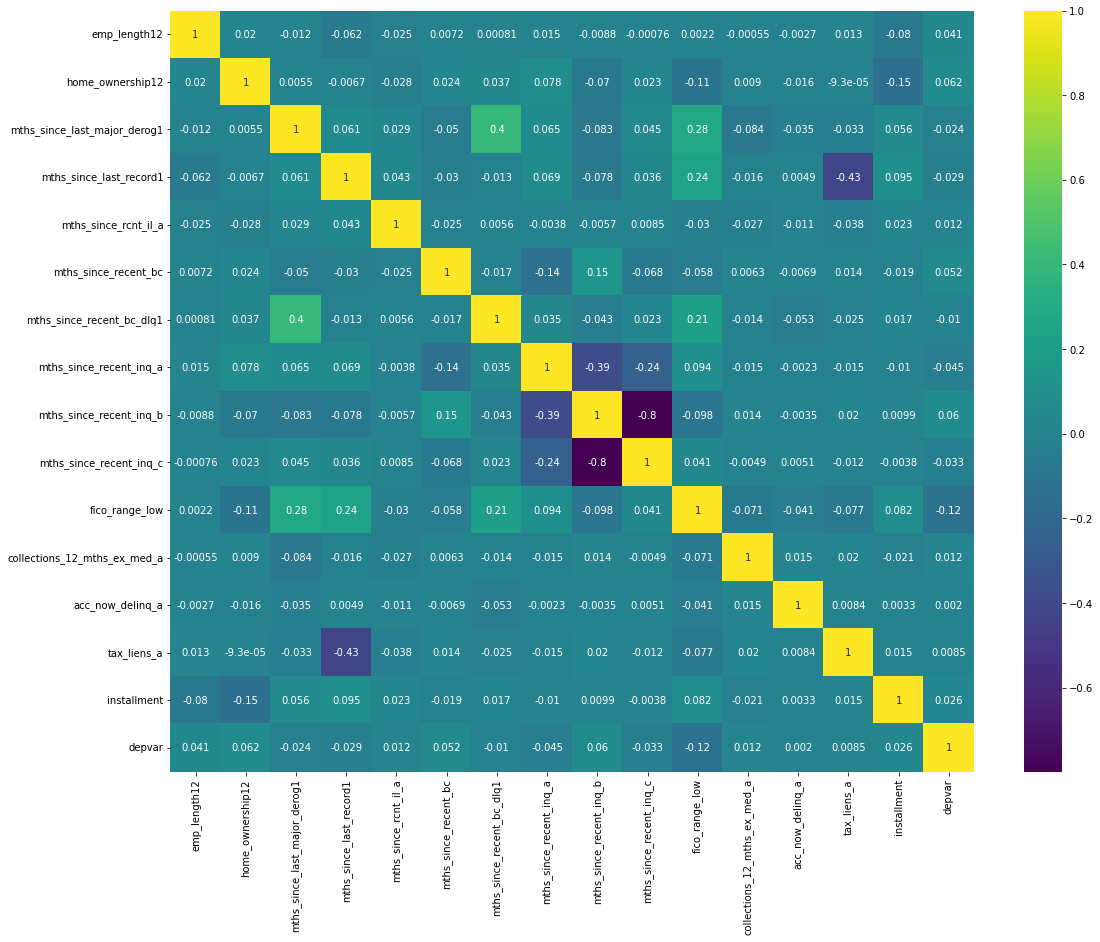

In [312]:
# 변수끼리의 상관성 확인

plt.figure(figsize=(18, 14))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [313]:
# 로지스틱 회귀모델 생성

import statsmodels.api as sm

data = sm.add_constant(data, has_constant = "add")    # 상수항 (beta zero)를 위한 컬럼 추가

X = data[data.columns.difference(['depvar'])]    # 변인변수들을 모아놓은 데이터프레임
y = data['depvar']    # 종속변수 데이터프레임

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [314]:
# 학습 set / 평가 set 분리

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(874335, 16) (218584, 16) (874335,) (218584,)


In [315]:
# 데이터 정규화 (스케일링)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()    # 평균 0, 표준편차 1로 변환

train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [316]:
# 모델 생성

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression()

In [317]:
# 모델의 정확도는...?

print(model.score(train_X, train_y))

0.8378115939542624


... 이전에 정확도가 좋게 나왔던 모델과 짬뽕을 시켜보자..

이전 모델 변수 : 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'collection_recovery_fee', 
              'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_cur_bal', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'emp_length', 
              'debt_settlement_flag1', 'term1', 'depvar'

In [318]:
# 필요 변수 추출한 데이터프레임 재생성 (annual_inc, dti 추가)

data = lc_df[['emp_length12', 'home_ownership12', 'mths_since_last_major_derog1', 'mths_since_last_record1', 'mths_since_rcnt_il_a', 
              'mths_since_recent_bc', 'mths_since_recent_bc_dlq1', 'mths_since_recent_inq_a', 'mths_since_recent_inq_b', 'mths_since_recent_inq_c', 
              'fico_range_low', 'collections_12_mths_ex_med_a', 'acc_now_delinq_a', 'tax_liens_a', 'installment', 'depvar', 'annual_inc', 'dti']]

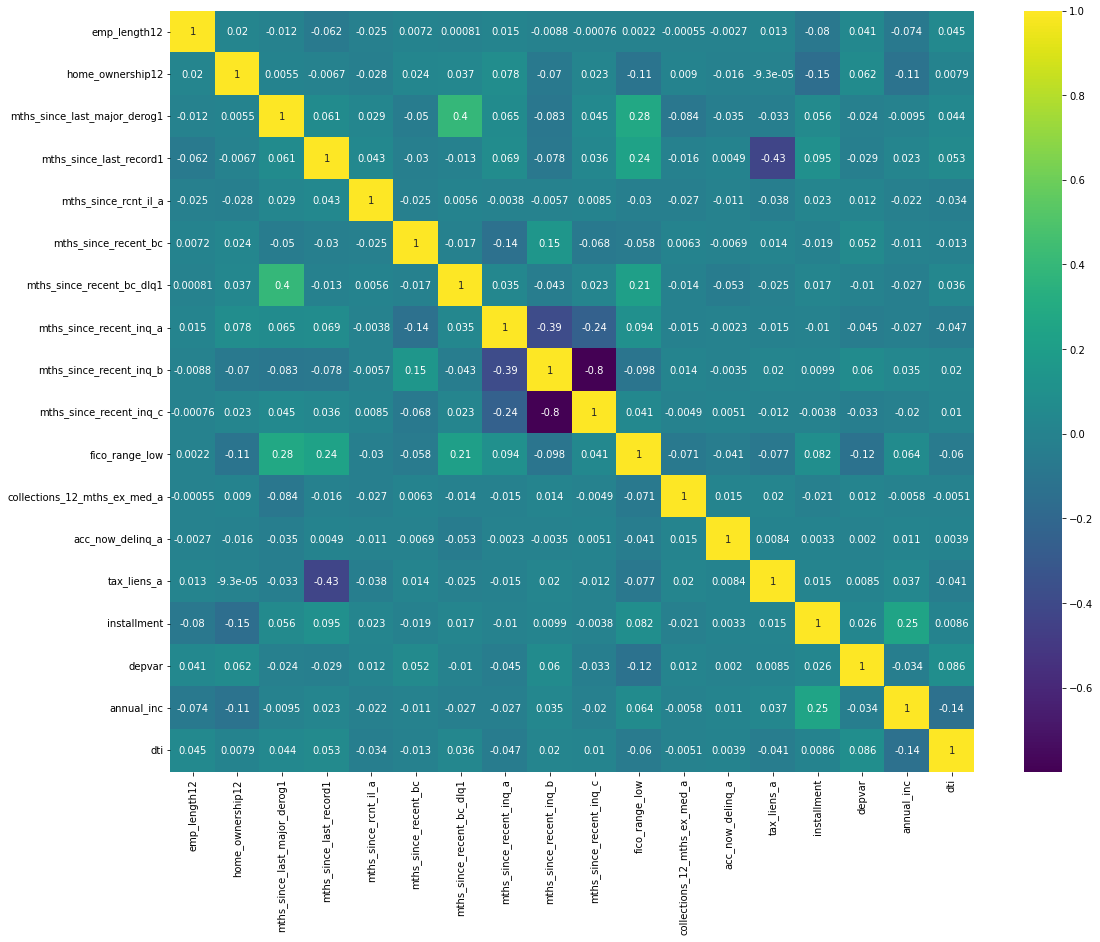

In [319]:
# 변수끼리의 상관성 확인

plt.figure(figsize=(18, 14))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [320]:
# 로지스틱 회귀모델 생성

import statsmodels.api as sm

data = sm.add_constant(data, has_constant = "add")    # 상수항 (beta zero)를 위한 컬럼 추가

X = data[data.columns.difference(['depvar'])]    # 변인변수들을 모아놓은 데이터프레임
y = data['depvar']    # 종속변수 데이터프레임


# 학습 set / 평가 set 분리

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2)

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)


# 데이터 정규화 (스케일링)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()    # 평균 0, 표준편차 1로 변환

train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)


# 모델 생성

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_y)


# 모델의 정확도는...?

print(model.score(train_X, train_y))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(874335, 18) (218584, 18) (874335,) (218584,)
0.8382633658723487


In [321]:
model = sm.Logit(train_y, train_X)

In [322]:
results = model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.684368
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [323]:
print(results.summary2())

                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.546      
Dependent Variable: depvar           AIC:              1196765.1747
Date:               2022-02-02 12:22 BIC:              1196952.0742
No. Observations:   874335           Log-Likelihood:   -5.9837e+05 
Df Model:           15               LL-Null:          -3.8694e+05 
Df Residuals:       874319           LLR p-value:      1.0000      
Converged:          1.0000           Scale:            1.0000      
-----------------------------------------------------------------------
            Coef.      Std.Err.      z      P>|z|     [0.025     0.975]
-----------------------------------------------------------------------
x1         -0.0010          nan     nan       nan        nan        nan
x2         -0.0970          nan     nan       nan        nan        nan
x3          0.0080          nan     nan       nan        nan        nan
const       0.0000          nan     nan       nan  

In [324]:
results.params

x1      -0.000954
x2      -0.097003
x3       0.007964
const    0.000000
x4       0.103975
x5       0.056737
x6      -0.153068
x7       0.082559
x8       0.091399
x9       0.002590
x10     -0.006518
x11      0.019282
x12      0.057304
x13      0.008927
x14     -0.037432
x15      0.042481
x16     -0.020236
x17      0.003775
dtype: float64

In [325]:
np.exp(results.params)

x1       0.999047
x2       0.907553
x3       1.007995
const    1.000000
x4       1.109573
x5       1.058377
x6       0.858072
x7       1.086062
x8       1.095706
x9       1.002593
x10      0.993504
x11      1.019469
x12      1.058978
x13      1.008967
x14      0.963260
x15      1.043396
x16      0.979968
x17      1.003782
dtype: float64